
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>


### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Introduction


### Question(s) for Analysis

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [37]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

 In this section of the report, you will load in the data, check for cleanliness.


### General Properties

In [4]:
# Load the data. 
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# showing the first 5 lines of the data!
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#exploring the shape of data
df.shape

(110527, 14)

the dataset contain 110527 rows and 14 columne

In [9]:
#checking for dublication
df.duplicated().sum()

0

there is no dublication in data set

In [10]:
#checking the number of dublicated pations id
df['PatientId'].duplicated().sum()

48228

there is 62299 unique value from 110527

In [11]:
#check for any value missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


no missing values

In [12]:
#show peice of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


here is some informations like mean age is 37 , max age is 115,min age is -1 that's wrong i will clean it ,
also about 55% of the age between 18 and 55 and almost 25% of patient only recive sms and majority doesn't have chronic disease.

In [13]:
#checking if there is pationt is duplicated but withe diffrent no show date
df.duplicated(['PatientId','No-show']).sum()

38710

here there is 38710 ids have the same statues

In [14]:
#ther is age = -1 i will identify the row
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
 

In [15]:
#remaoving the negative value for age(-1)
df.drop(index=99832,inplace=True)

In [16]:
#show the  dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
#first i will correct the columnes name
df.rename(columns = {'Hipertension': 'Hypertension'},inplace = True)
df.rename(columns = {'No-show':'No_show'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
#here i will remove the duplicated id that have dublicated showing state 
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

In [19]:
#cleaning the unnecessary data 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# data wrangling summary
 first we Load the data,showing the first 5 lines of the data and exploring the shape of data also checking for dublication  and check for any value missing checking if there is pationt is duplicated but withe diffrent no show date and correct the columnes name ,also remove the duplicated id that have dublicated showing state and finally cleaning the unnecessary data 


# Exploratory Data Analysis


after we have cleaning and transform the data Now we will explore the data and Compute statistics and create visualizations

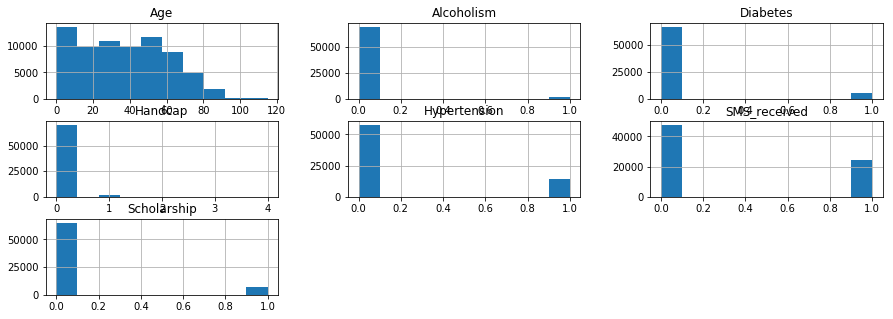

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,5));

In [21]:
# here i will dividing the patient in two groups based on show or not
show=df.No_show=='No'
noshow=df.No_show=='Yes'
df[show].count(),df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

we see here that number of showed pationt is [54153] 3 time grater than   number of noshowed pationt [17663]

In [22]:
df[show].mean(),df[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

we see here that the mean age for no show patient equal 34 and for show patient is 37 also no show patient recive sms more than 
show patient so we will check that

# checking the factor that influnce on the attendant rate


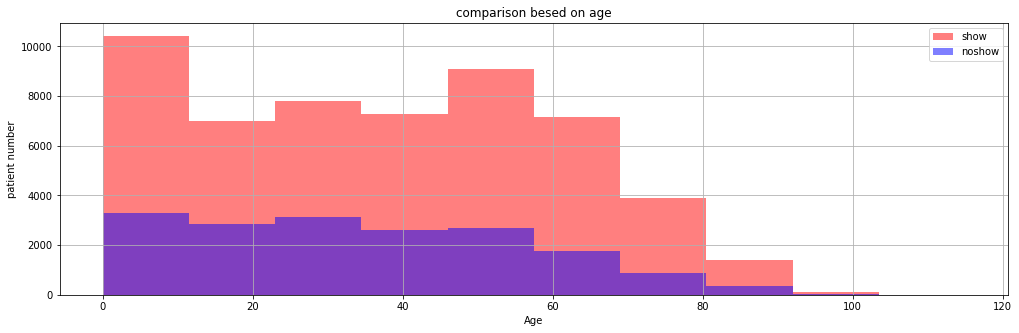

In [39]:
#doese age affect on attendance
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[17,5])
    df[col_name][show].hist(alpha=.5,bins=10,color='red',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,color='blue',label='noshow')
    plt.legend();
    plt.title('comparison besed on age')
    plt.xlabel('Age')
    plt.ylabel('patient number');
attendance(df,'Age',show,noshow)

here in the graph ages from (0 to 9) are the most showing care then from (45:55)

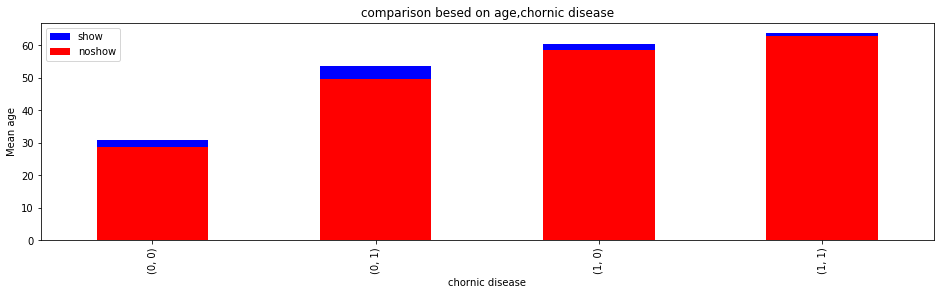

In [40]:
#dese age and acronic aisease affect the attendence
plt.figure(figsize=(16,4))
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('comparison besed on age,chornic disease')
plt.xlabel('chornic disease')
plt.ylabel('Mean age');


In [41]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

here we will discover that mean age of Hypertension Diabetes showing pations is around 64 and non showing is equal 63 and 
mean age of chornic disease showing pations is around 30 and non showing is equal 28 that is mean that there is no correlation 
between age and  chornic disease also no correlation between chornic disease and attendence.

checking if the gender affect on the attendenc?

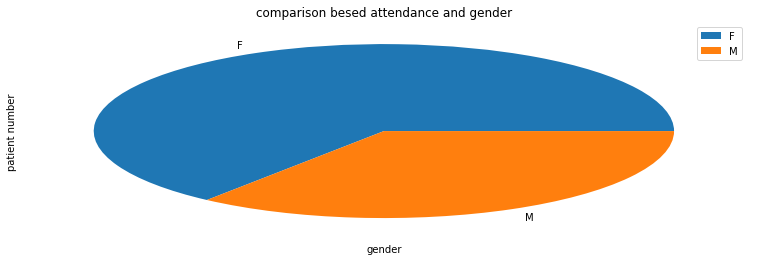

In [43]:
#check for the percentage of sexes attending?
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[13,4])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('comparison besed attendance and gender')
    plt.xlabel('gender')
    plt.ylabel('patient number');
attendance(df,'Gender',show,noshow)

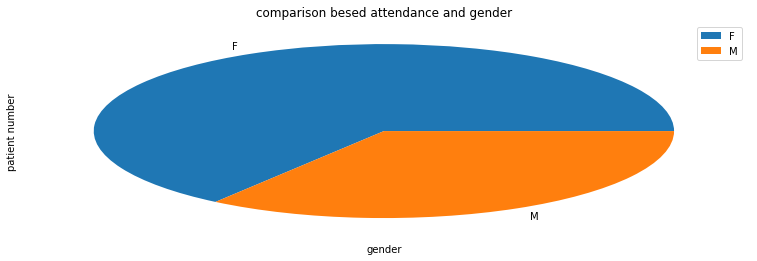

In [44]:
#check for the percentage of sexes attending?
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[13,4])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('comparison besed attendance and gender')
    plt.xlabel('gender')
    plt.ylabel('patient number');
attendance(df,'Gender',show,noshow)

so based on the two bie chart gender does not affect on attendenc

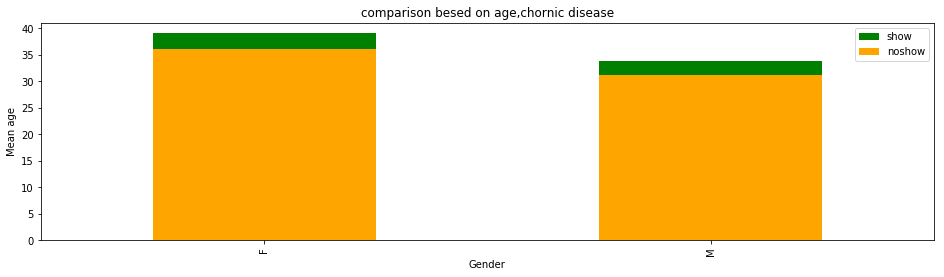

In [45]:
#checking if the age and chronic affecting the attendenc togother
plt.figure(figsize=(16,4))
df[show].groupby('Gender').Age.mean().plot(kind='bar',color='green',label='show')
df[noshow].groupby('Gender').Age.mean().plot(kind='bar',color='orange',label='noshow')
plt.legend();
plt.title('comparison besed on age,chornic disease')
plt.xlabel('Gender')
plt.ylabel('Mean age');

In [46]:
print(df[show].groupby('Gender').Age.mean(),df[noshow].groupby('Gender').Age.mean(),
df[show].groupby('Gender').Age.mean(),df[noshow].groupby('Gender').Age.mean())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64


here the median and the mean of seax are like each other 
so ther is no correlation between age and gender affecting the rate of show

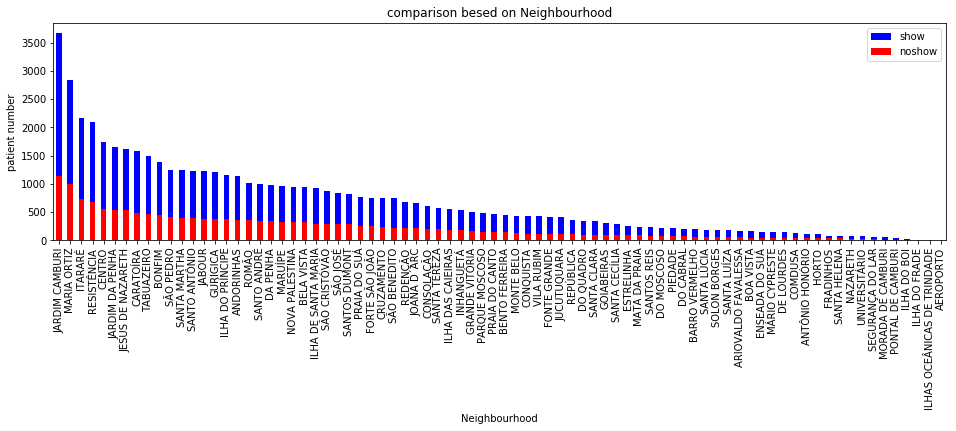

In [48]:
#checking the effect of neighbourhood on the attendence
plt.figure(figsize=[16,4])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('comparison besed on Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('patient number');

as we notice here jardim camburi has the greastest number of patient and show rate
so the Neighbourhood affect on attendanc

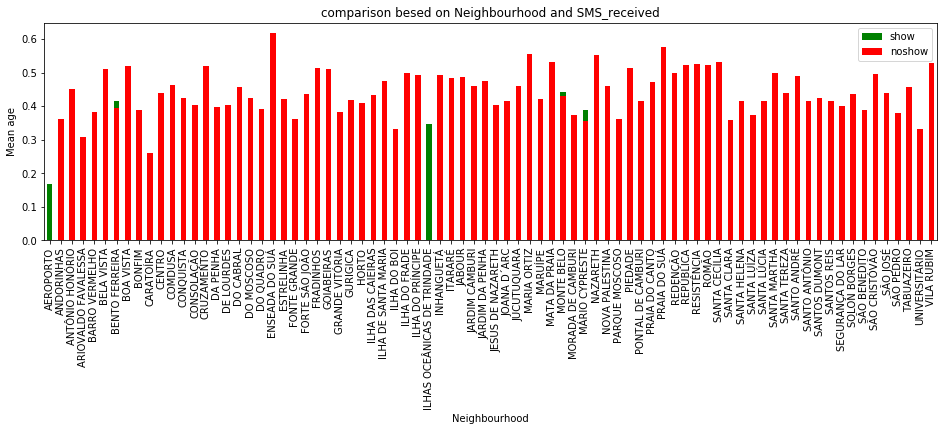

In [49]:
#checking if the sms recived
plt.figure(figsize=(16,4))
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='green',label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('comparison besed on Neighbourhood and SMS_received')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean age');

we notice here that sms affect only on 5 Neighbourhood(green bar)

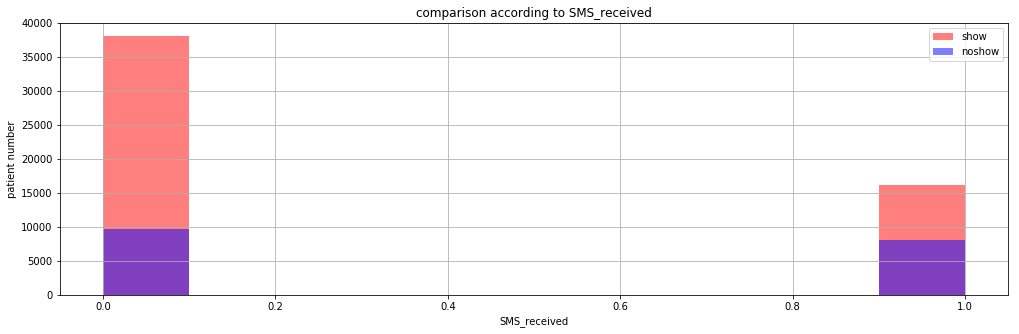

In [50]:
#effect of receving SMS to the attendence
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[17,5])
    df[col_name][show].hist(alpha=.5,bins=10,color='red',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,color='blue',label='noshow')
    plt.legend();
    plt.title('comparison according to SMS_received')
    plt.xlabel('SMS_received')
    plt.ylabel('patient number');
attendance(df,'SMS_received',show,noshow)

there are abig number of patients didtn't receive sms  so we should send more sms

<a id='conclusions'></a>
## Conclusions
1-the showing rate is affected by age, ages from (0 to 9) are the most showing care then from (45:55).

2-Neighbourhood affect on attendanc as we notice here jardim camburi has the greastest number of patient and show rate.

3-the different gender or alcoholic is not a factor to decide if the person would come to his appointment or not!

4-there are abig number of patients didtn't receive sms so we should send more sms to those pationts.



## Limitations

1-im my opinion to get more sure what is the most feature that impacts showing to the appointment we should get some other   features like the patient have a series medical issue or not.

2-but in the end there is no correlation between showing and chornic disease , gender affect the enrollement in welfare program 


In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0